In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np


In [2]:
# Load Spotify data (I cleaned the data by combining the top 200 songs in the US for the time period = 
#october 1, 2018 - september 30, 2019 for the purpose of the grammys and created a csv file) 

spotify_df=pd.read_csv('resources/Spotify_q2.csv')
spotify_df


,rank,uri,artist_names,artist_names_1,artist_names_2,artist_names_3,artist_names_4,artist_names_5,artist_names_6,artist_names_7,...,artist_names_10,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,season,month,week
0,1,spotify:track:78QR3Wp35dqAhFEc2qAGjE,"Lil Baby, Gunna",Lil Baby,Gunna,NaN,NaN,NaN,NaN,NaN,...,NaN,Drip Too Hard (Lil Baby & Gunna),Quality Control Music/Young Stoner Life Record...,1,18,4,11011445,Autumn,October,1
1,2,spotify:track:2xLMifQCjDGFmkHkpNLD9h,Travis Scott,Travis Scott,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,SICKO MODE,Cactus Jack / Epic / Grand Hustle,1,7,10,9596879,Autumn,October,1
2,3,spotify:track:6wWaVoUOzLQJHd3bWAUpdZ,"Lil Baby, Gunna, Drake",Lil Baby,Gunna,Drake,NaN,NaN,NaN,NaN,...,NaN,"Never Recover (Lil Baby & Gunna, Drake)",Quality Control Music/Young Stoner Life Record...,3,-1,1,9209570,Autumn,October,1
3,4,spotify:track:1xzBco0xcoJEDXktl7Jxrr,Sheck Wes,Sheck Wes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Mo Bamba,Cactus Jack Records/ G.O.O.D. Music/ Interscop...,4,13,11,9029401,Autumn,October,1
4,5,spotify:track:0dbTQYW3Ad1FTzIA9t90E8,"Lil Wayne, Kendrick Lamar",Lil Wayne,Kendrick Lamar,NaN,NaN,NaN,NaN,NaN,...,NaN,Mona Lisa (feat. Kendrick Lamar),"Young Money Records, Inc.",1,1,2,8749506,Autumn,October,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10395,196,spotify:track:5wujBwqG7INdStqGd4tRMX,Juice WRLD,Juice WRLD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Armed And Dangerous,Juice WRLD Mixtape / ISR P&D,9,182,46,1544661,Summer,September,52
10396,197,spotify:track:5PYQUBXc7NYeI1obMKSJK0,Katy Perry,Katy Perry,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Never Really Over,Capitol Records,10,181,18,1540472,Summer,September,52
10397,198,spotify:track:0TlLq3lA83rQOYtrqBqSct,Drake,Drake,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Nonstop,Cash Money/Drake LP6,1,180,66,1539630,Summer,September,52
10398,199,spotify:track:0W45ni3uikr9z0vPjlBIDw,Summer Walker,Summer Walker,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Playing Games,LVRN/Interscope Records,199,-1,1,1530463,Summer,September,52


In [3]:
# Get a list of columns for the spotify_df

spotify_df.columns


Index(['rank', 'uri', 'artist_names', 'artist_names_1', 'artist_names_2',
       'artist_names_3', 'artist_names_4', 'artist_names_5', 'artist_names_6',
       'artist_names_7', 'artist_names_8', 'artist_names_9', 'artist_names_10',
       'track_name', 'source', 'peak_rank', 'previous_rank', 'weeks_on_chart',
       'streams', 'season', 'month', 'week'],
      dtype='object')

In [4]:
# Now rename the spotify_df column headers... we are looking to remove any unnessary columns

spotify_df.rename(columns = ({'rank':'Song Ranking','uri':'Spotify URL','artist_names': 'N1','artist_names_1':'Artist',
                              'artist_names_2':'N2','artist_names_3':'N3','artist_names_4':'N4', 'artist_names_5':'N5', 
                              'artist_names_6':'N6','artist_names_7':'N7', 'artist_names_8':'N8', 'artist_names_9':"N9", 
                              'artist_names_10':'N10','track_name': 'Track Name','source': 'Source', 
                              'peak_rank':'Peak Rank','previous_rank':'Previous Rank',
                               'weeks_on_chart':'Number of Weeks on Chart','streams':'Number of Streams',
                              'season':'Season', 'month':'Month', 'week':'Week During Eligibility Period'}),
inplace=True,)

spotify_df.columns


Index(['Song Ranking', 'Spotify URL', 'N1', 'Artist', 'N2', 'N3', 'N4', 'N5',
       'N6', 'N7', 'N8', 'N9', 'N10', 'Track Name', 'Source', 'Peak Rank',
       'Previous Rank', 'Number of Weeks on Chart', 'Number of Streams',
       'Season', 'Month', 'Week During Eligibility Period'],
      dtype='object')

In [5]:
# Remove unwanted columns

spotify_df.drop(['Spotify URL', 'N1', 'N2', 'N3', 'N4', 'N5',
       'N6', 'N7', 'N8', 'N9', 'N10', 'Source', 'Season', 'Month'], axis=1, inplace = True)


In [6]:
# Review the new columns in the table spotify_df

spotify_df.head()


,Song Ranking,Artist,Track Name,Peak Rank,Previous Rank,Number of Weeks on Chart,Number of Streams,Week During Eligibility Period
0,1,Lil Baby,Drip Too Hard (Lil Baby & Gunna),1,18,4,11011445,1
1,2,Travis Scott,SICKO MODE,1,7,10,9596879,1
2,3,Lil Baby,"Never Recover (Lil Baby & Gunna, Drake)",3,-1,1,9209570,1
3,4,Sheck Wes,Mo Bamba,4,13,11,9029401,1
4,5,Lil Wayne,Mona Lisa (feat. Kendrick Lamar),1,1,2,8749506,1


In [ ]:
# ANALYZE THE TOP 10 ARTIST IN THE SPOTIFY DATA

In [7]:
# Create a pivot table to display the total number of streams per artists

ArtistPivot = pd.pivot_table(spotify_df,index='Artist',values='Number of Streams',aggfunc='sum')
ArtistPivot


,Number of Streams
Artist,
*NSYNC,5690510
2 Chainz,16584104
21 Savage,323747104
24kGoldn,5827717
5 Seconds of Summer,174454567
...,...
Zara Larsson,43193727
Zedd,81369622
benny blanco,275978397


In [8]:
# List the 10 top artists with the most streams

top10Artist = ArtistPivot['Number of Streams'].sort_values(ascending=False).head(10)
top10Artist


Artist
Post Malone      2000352968
Billie Eilish    1582308834
Ariana Grande    1360841452
XXXTENTACION     1211082080
Juice WRLD       1071931470
Khalid            973437673
Lil Baby          717333741
Drake             633698441
Travis Scott      560552885
Lil Nas X         542893632
Name: Number of Streams, dtype: int64

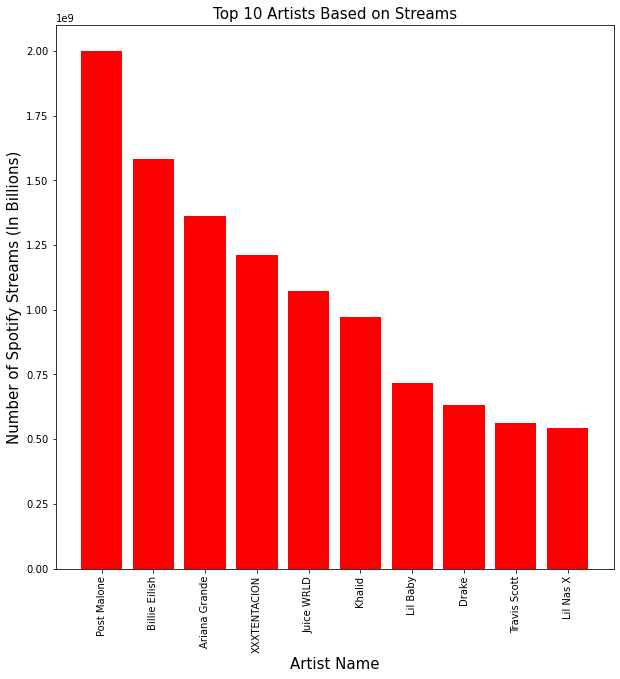

In [9]:
#Create a bar chart for the top10Artist data frame

#inserting the raw data
artist = ['Post Malone','Billie Eilish','Ariana Grande','XXXTENTACION','Juice WRLD','Khalid','Lil Baby','Drake','Travis Scott','Lil Nas X']
streams = [2000352968,1582308834,1360841452,1211082080,1071931470,973437673,717333741,633698441,560552885,542893632]



#plotting the bar
plt.figure(figsize=(10,10))
plt.bar(range(0,10),streams, color="red")
plt.xticks(range(0,10),artist,rotation=90)
plt.xlabel("Artist Name",fontsize = 15)
plt.ylabel("Number of Spotify Streams (In Billions)",fontsize=15)
plt.title ("Top 10 Artists Based on Streams",fontsize=15)
plt.savefig('resources/Top10Artists_q2.png')
plt.show()



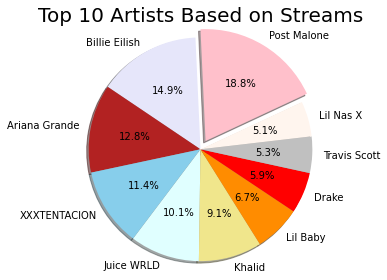

In [10]:
# Additional Visualizations
# A Pie Chart

#inserting the raw data
artist = ['Post Malone','Billie Eilish','Ariana Grande','XXXTENTACION','Juice WRLD','Khalid','Lil Baby','Drake','Travis Scott','Lil Nas X']
streams = [2000352968,1582308834,1360841452,1211082080,1071931470,973437673,717333741,633698441,560552885,542893632]
colors = ["pink","lavender","firebrick","skyblue","lightcyan","khaki","darkorange","red","silver","seashell"]
explode = (0.1,0,0,0,0,0,0,0,0,0)


#plotting the pie chart
plt.pie(streams,explode=explode,labels=artist,colors=colors,autopct="%1.1f%%",shadow=True, startangle=25,radius=1.15)
plt.axis = ("equal")
plt.title ("Top 10 Artists Based on Streams",fontsize=20)
plt.tight_layout()
plt.savefig('resources/CircleTop10Artists_q2.png')
plt.show()


In [ ]:
# ANANLYZE SPOTIFY TOP ARTIST DF & BEST NEW ARTIST GRAMMY DATA

In [11]:
# Now analyze the best new artist data to see if the winner for this category ranked in our top 10 
# spotify artist df 

#Load best new artist grammy csv

BestNewArtist_df=pd.read_csv('resources/BestNewArtist_clean_q2.csv')
BestNewArtist_df


,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Billie Eilish,Billie Eilish,NaN,NaN,Yes
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Black Pumas,Black Pumas,NaN,NaN,No
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Lil Nas X,Lil Nas X,NaN,NaN,No
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Lizzo,Lizzo,NaN,NaN,No
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Maggie Rogers,Maggie Rogers,NaN,NaN,No
5,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,ROSALIA,ROSALIA,NaN,NaN,No
6,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Tank And The Bangas,Tank And The Bangas,NaN,NaN,No
7,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Yola,Yola,NaN,NaN,No


In [12]:
# Get list of columns for best new artist data frame

BestNewArtist_df.columns


Index(['year', 'title', 'published_at', 'updated_at', 'category', 'nominee',
       'artist', 'workers', 'img', 'winner'],
      dtype='object')

In [13]:
# Rename the columns in the BestNewArtist_df and make a common column that's found in the ArtistPivot table
# We are going to merge based on Artist column

BestNewArtist_df.rename(columns = ({'year':'Year','title':'Grammy Title','published_at': 'Published At', 
                               'updated_at': 'Updated At','category': 'Category', 'nominee':'Track Name',
                               'artist':'Artist',
                               'workers':'Song Credits','img':'IMG Link',
                              'winner':'Winner'}),
inplace=True,)

BestNewArtist_df.head()


,Year,Grammy Title,Published At,Updated At,Category,Track Name,Artist,Song Credits,IMG Link,Winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Billie Eilish,Billie Eilish,NaN,NaN,Yes
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Black Pumas,Black Pumas,NaN,NaN,No
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Lil Nas X,Lil Nas X,NaN,NaN,No
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Lizzo,Lizzo,NaN,NaN,No
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Maggie Rogers,Maggie Rogers,NaN,NaN,No


In [14]:
# Merge this data frame with the ArtistPivot table

mergeBNA_df=pd.merge(ArtistPivot,BestNewArtist_df,on="Artist", how = 'right')
mergeBNA_df.head()


,Artist,Number of Streams,Year,Grammy Title,Published At,Updated At,Category,Track Name,Song Credits,IMG Link,Winner
0,Billie Eilish,1.582309e+09,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Billie Eilish,NaN,NaN,Yes
1,Black Pumas,NaN,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Black Pumas,NaN,NaN,No
2,Lil Nas X,5.428936e+08,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Lil Nas X,NaN,NaN,No
3,Lizzo,3.044307e+08,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Lizzo,NaN,NaN,No
4,Maggie Rogers,NaN,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Maggie Rogers,NaN,NaN,No


In [15]:
# Get a list of all the columns

mergeBNA_df.columns


Index(['Artist', 'Number of Streams', 'Year', 'Grammy Title', 'Published At',
       'Updated At', 'Category', 'Track Name', 'Song Credits', 'IMG Link',
       'Winner'],
      dtype='object')

In [16]:
# Remove all unnecessary columns

mergeBNA_df.drop(['Published At', 'Updated At', 'Track Name',
       'Song Credits', 'IMG Link'], axis=1, inplace = True)


In [17]:
# Look at the new headers

mergeBNA_df.head()


,Artist,Number of Streams,Year,Grammy Title,Category,Winner
0,Billie Eilish,1.582309e+09,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,Yes
1,Black Pumas,NaN,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No
2,Lil Nas X,5.428936e+08,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No
3,Lizzo,3.044307e+08,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No
4,Maggie Rogers,NaN,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No


In [18]:
# There are numerical columns with missing data that should be numbers but are not populated becasue some 
# artists did not appear in our ArtistPivot table 
# Therefore fill any empty data / nAs with 0 

cleanmergeBNA_df = mergeBNA_df.fillna(0)
cleanmergeBNA_df


,Artist,Number of Streams,Year,Grammy Title,Category,Winner
0,Billie Eilish,1.582309e+09,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,Yes
1,Black Pumas,0.000000e+00,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No
2,Lil Nas X,5.428936e+08,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No
3,Lizzo,3.044307e+08,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No
4,Maggie Rogers,0.000000e+00,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No
5,ROSALIA,1.594385e+07,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No
6,Tank And The Bangas,0.000000e+00,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No
7,Yola,0.000000e+00,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No


In [19]:
# Review the datatype
# Will need to convert the Number of Streams into Intergers

cleanmergeBNA_df.dtypes


Artist                object
Number of Streams    float64
Year                   int64
Grammy Title          object
Category              object
Winner                object
dtype: object

In [20]:
# Update data type and review new column data type

cleanmergeBNA_df['Number of Streams ']=cleanmergeBNA_df['Number of Streams'].astype(np.int64)
cleanmergeBNA_df.dtypes


Artist                 object
Number of Streams     float64
Year                    int64
Grammy Title           object
Category               object
Winner                 object
Number of Streams       int64
dtype: object

In [21]:
# We need to remove the Number of Streams float column

newcleanmergeBNA_df = cleanmergeBNA_df.set_axis(['Artist', 'NO', 'Year', 'Grammy Title', 'Category',
                                                 'Winner','Number of Streams'], axis=1, inplace=False)
newcleanmergeBNA_df


,Artist,NO,Year,Grammy Title,Category,Winner,Number of Streams
0,Billie Eilish,1.582309e+09,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,Yes,1582308834
1,Black Pumas,0.000000e+00,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No,0
2,Lil Nas X,5.428936e+08,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No,542893632
3,Lizzo,3.044307e+08,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No,304430684
4,Maggie Rogers,0.000000e+00,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No,0
5,ROSALIA,1.594385e+07,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No,15943848
6,Tank And The Bangas,0.000000e+00,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No,0
7,Yola,0.000000e+00,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No,0


In [22]:
# Drop other column 
newcleanmergeBNA_df.drop(['NO'], axis=1, inplace = True)


In [23]:
# View the new data frame
newcleanmergeBNA_df.head(10)


,Artist,Year,Grammy Title,Category,Winner,Number of Streams
0,Billie Eilish,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,Yes,1582308834
1,Black Pumas,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No,0
2,Lil Nas X,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No,542893632
3,Lizzo,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No,304430684
4,Maggie Rogers,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No,0
5,ROSALIA,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No,15943848
6,Tank And The Bangas,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No,0
7,Yola,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,No,0


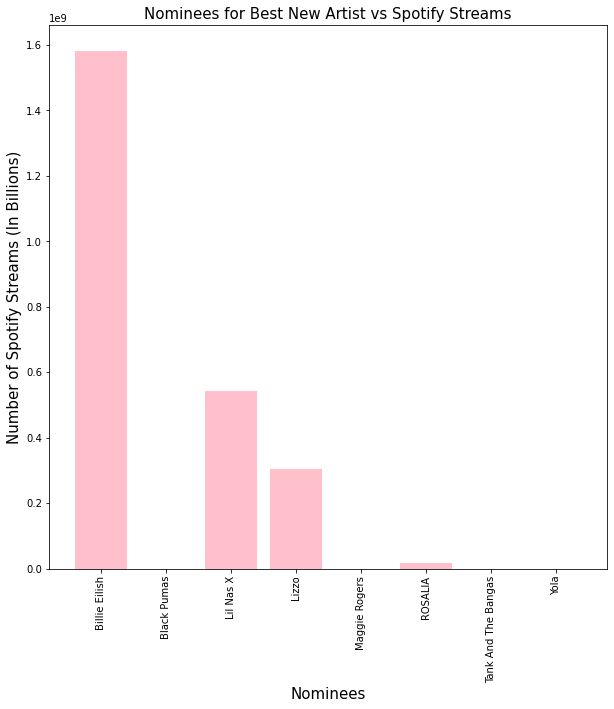

In [24]:
#Create a bar chart for the Best New Artist data frame

#inserting the raw data
newartist = ['Billie Eilish','Black Pumas','Lil Nas X','Lizzo','Maggie Rogers','ROSALIA', 'Tank And The Bangas','Yola']
streams = [1582308834,0,542893632,304430684,0,15943848,0,0]



#plotting the bar
plt.figure(figsize=(10,10))
plt.bar(range(0,8),streams, color="pink")
plt.xticks(range(0,8),newartist,rotation=90)
plt.xlabel("Nominees",fontsize = 15)
plt.ylabel("Number of Spotify Streams (In Billions)",fontsize=15)
plt.title ("Nominees for Best New Artist vs Spotify Streams",fontsize=15)
plt.savefig('resources/BestNewArtist_q2.png')
plt.show()


In [ ]:
# ANALYZE THE TOP 10 SONGS IN SPOTIFY DF 

In [ ]:
# Create a pivot table to create the total number of track name streams 

TrackNamePivot = pd.pivot_table(spotify_df,index='Track Name',values='Number of Streams',aggfunc='sum')
TrackNamePivot


In [ ]:
# List the top 10 songs with the most streams

top10TrackName=TrackNamePivot['Number of Streams'].sort_values(ascending=False).head(10)
top10TrackName


In [ ]:
#Create a bar chart for the top10Artist data frame

#inserting the raw data
trackname = ['Sunflower - Spider-Man: Into the Spider-Verse','Drip Too Hard (Lil Baby & Gunna)','thank u, next',      
          'SICKO MODE','Wow.','Without Me','Going Bad (feat. Drake)','7 rings','MIDDLE CHILD',
          'ZEZE (feat. Travis Scott & Offset)']
streams = [434879595,297904285,292828353,291735974,280738276,261729933,259627327,259574378,253135604,252968224]



#plotting the bar
plt.figure(figsize=(10,10))
plt.bar(range(0,10),streams, color="green")
plt.xticks(range(0,10),trackname,rotation=90)
plt.xlabel("Songs",fontsize = 15)
plt.ylabel("Number of Spotify Streams (In Hundred Millions)",fontsize=15)
plt.title ("Top 10 Songs Based on Streams",fontsize=15)
plt.savefig('resources/Top10Songs_q2.png')
plt.show()


In [ ]:
# ANANLYZE SPOTIFY SONGS & RECORD OF THE YEAR GRAMMY DATA

In [ ]:
# Now analyze the Record of the Year data to see if the winner for this category ranked in our top 10 Spotify Songs
#Load the csv file that contains song of the year
RecordofYear_df=pd.read_csv('resources/RecordofYear_clean_q2.csv')
RecordofYear_df


In [ ]:
# Get list of columns
RecordofYear_df.columns


In [ ]:
# Rename the columns and make a common column name so we can complete the 
# We are going to merge based on Track Name column
RecordofYear_df.rename(columns = ({'year':'Year','title':'Grammy Title','published_at': 'Published At', 
                               'updated_at': 'Updated At','category': 'Category', 'nominee':'Track Name',
                               'artist':'Artist',
                               'workers':'Song Credits','img':'IMG Link',
                              'winner':'Winner'}),
inplace=True,)

RecordofYear_df.head()


In [ ]:
# Now merge the spotify_df with the new df using a right join on the column Track Name 
# This displays data for artist found in both data frames
RecordofYearMerge=pd.merge(TrackNamePivot,RecordofYear_df,on="Track Name", how = 'right')
RecordofYearMerge.head()


In [ ]:
# Get a list of all the columns
RecordofYearMerge.columns


In [ ]:
# Remove all unnecessary columns
RecordofYearMerge.drop(['Published At', 'Updated At', 'Song Credits',
       'IMG Link'], axis=1, inplace = True)

In [ ]:
# Review new columns
RecordofYearMerge.head()


In [ ]:
# There are numerical columns with missing data that should be numbers but are not populated becasue the 
# artist did not appear have any songs appear in the spotify_df due to the US top weekly only showcasing 
# the top 200 songs per week
# Therefore fill any empty data / nAs with 0 
cleanRecordofYearMerge = RecordofYearMerge.fillna(0)
cleanRecordofYearMerge


In [ ]:
#Create a bar chart for the Record of the Year data frame

#inserting the raw data
recordoftheyear = ['bad guy','Hey, Ma','7 rings','Hard Place','Talk',
             'Old Town Road','Truth Hurts','Sunflower - Spider-Man: Into the Spider-Verse']
streams = [220247075,0,259574378,0,46824327,137909882,185064517,434879595]



#plotting the bar
plt.figure(figsize=(10,10))
plt.bar(range(0,8),streams, color="lavender")
plt.xticks(range(0,8),recordoftheyear,rotation=90)
plt.xlabel("Nominees",fontsize = 15)
plt.ylabel("Number of Spotify Streams (In Hundred Millions)",fontsize=15)
plt.title ("Nominees for Record of the Year vs Spotify Streams",fontsize=15)
plt.savefig('resources/RecordoftheYear_q2.png')

In [ ]:
# ANANLYZE SPOTIFY SONGS & SONG OF THE YEAR GRAMMY DATA

In [ ]:
# Now analyze the Song of the Year data to see if the winner for this category ranked in our top 10 Spotify Songs
#Load the csv file that contains song of the year
SongofYear_df=pd.read_csv('resources/SongofYear_clean_q2.csv')
SongofYear_df


In [ ]:
# Get list of columns
SongofYear_df.columns


In [ ]:
# Rename the columns in the df and make a common column name so we can complete the 
# We are going to merge based on Track Name column
SongofYear_df.rename(columns = ({'year':'Year','title':'Grammy Title','published_at': 'Published At', 
                               'updated_at': 'Updated At','category': 'Category', 'nominee':'Track Name',
                               'artist':'Artist',
                               'workers':'Song Credits','img':'IMG Link',
                              'winner':'Winner'}),
inplace=True,)

SongofYear_df.head()


In [ ]:
# Now merge the spotify_df with new df using a right join on the column Track Name 
# This displays data for artist found in both data frames
SongofYearMerge=pd.merge(TrackNamePivot,SongofYear_df,on="Track Name", how = 'right')
SongofYearMerge.head()


In [ ]:
# Get a list of all the columns
SongofYearMerge.columns


In [ ]:
# Remove all unnecessary columns
SongofYearMerge.drop(['Published At', 'Updated At', 'Song Credits',
       'IMG Link'], axis=1, inplace = True)


In [ ]:
# Review new columns
SongofYearMerge.head()


In [ ]:
# There are numerical columns with missing data that should be numbers but are not populated becasue the 
# artist did not appear have any songs appear in the spotify_df due to the US top weekly only showcasing 
# the top 200 songs per week
# Therefore fill any empty data / nAs with 0 
cleanSongofYearMerge = SongofYearMerge.fillna(0)
cleanSongofYearMerge


In [ ]:
#Create a bar chart for the Song of the Year data frame

#inserting the raw data
songoftheyear = ['bad guy','Always Remember Us This Way','Bring My Flowers Now','Hard Place','Lover',
             'Norman fucking Rockwell','Someone You Loved','Truth Hurts']
streams = [220247075,21711412,0,0,44441498,5060716,90216295,185064517]



#plotting the bar
plt.figure(figsize=(10,10))
plt.bar(range(0,8),streams, color="black")
plt.xticks(range(0,8),songoftheyear,rotation=90)
plt.xlabel("Nominees",fontsize = 15)
plt.ylabel("Number of Spotify Streams (In Billions)",fontsize=15)
plt.title ("Nominees for Song of the Year vs Spotify Streams",fontsize=15)
plt.savefig('resources/SongoftheYear_q2.png')
plt.show()


In [ ]:
# ANANLYZE SPOTIFY SONGS & BEST RAP SONG GRAMMY DATA

In [ ]:
#Load the csv file that contains rap
RapSong_df=pd.read_csv('resources/BestRapSong_clean_q2.csv')
RapSong_df


In [ ]:
# Get list of columns
RapSong_df.columns


In [ ]:
# Rename the columns in the df and make a common column name so we can complete the 
# We are going to merge based on Track Name column
RapSong_df.rename(columns = ({'year':'Year','title':'Grammy Title','published_at': 'Published At', 
                               'updated_at': 'Updated At','category': 'Category', 'nominee':'Track Name',
                               'artist':'Artist',
                               'workers':'Song Credits','img':'IMG Link',
                              'winner':'Winner'}),
inplace=True,)

RapSong_df.head()


In [ ]:
# Now merge the spotify_df with the new df using a right join on the column Track Name 
# This displays data for artist found in both data frames
RapSongMerge=pd.merge(TrackNamePivot,RapSong_df,on="Track Name", how = 'right')
RapSongMerge.head()


In [ ]:
# Get a list of all the columns
RapSongMerge.columns


In [ ]:
# Remove all unnecessary columns
RapSongMerge.drop(['Published At', 'Updated At', 'Song Credits',
       'IMG Link'], axis=1, inplace = True)


In [ ]:
RapSongMerge.head()


In [ ]:
# There are numerical columns with missing data that should be numbers but are not populated becasue the 
# artist did not appear have any songs appear in the spotify_df due to the US top weekly only showcasing 
# the top 200 songs per week
# Therefore fill any empty data / nAs with 0 
cleanRapSongMerge = RapSongMerge.fillna(0)
cleanRapSongMerge


In [ ]:
#Create a bar chart for Best Rap Song

#inserting the raw data
bestrapsong = ['a lot','Bad Idea','Gold Roses (feat. Drake)','Racks in the Middle','Suge']
streams = [169203004,0,10575226,31432352,145471665]



#plotting the bar
plt.figure(figsize=(10,10))
plt.bar(range(0,5),streams, color="purple")
plt.xticks(range(0,5),bestrapsong,rotation=90)
plt.xlabel("Nominees",fontsize = 15)
plt.ylabel("Number of Spotify Streams (In Hundred Millions)",fontsize=15)
plt.title ("Nominees for Best Rap Song vs Spotify Streams",fontsize=15)
plt.savefig('resources/BestRapSong_q2.png')
plt.show()


In [ ]:
# ANANLYZE SPOTIFY SONGS & BEST R&B SONG GRAMMY DATA

In [ ]:
#Load the csv file that contains r&b
RBSong_df=pd.read_csv('resources/BestRBSong_clean_q2.csv')
RBSong_df


In [ ]:
# Get list of columns
RBSong_df.columns


In [ ]:
# Rename the columns in the df and make a common column name so we can complete the 
# We are going to merge based on Track Name column
RBSong_df.rename(columns = ({'year':'Year','title':'Grammy Title','published_at': 'Published At', 
                               'updated_at': 'Updated At','category': 'Category', 'nominee':'Track Name',
                               'artist':'Artist',
                               'workers':'Song Credits','img':'IMG Link',
                              'winner':'Winner'}),
inplace=True,)

RBSong_df.head()


In [ ]:
# Now merge the spotify_df with the new df using a right join on the column Track Name 
# This displays data for artist found in both data frames
RBSongMerge=pd.merge(TrackNamePivot,RBSong_df,on="Track Name", how = 'right')
RBSongMerge.head()


In [ ]:
# Get a list of all the columns
RBSongMerge.columns


In [ ]:
# Remove all unnecessary columns
RBSongMerge.drop(['Published At', 'Updated At', 'Song Credits',
       'IMG Link'], axis=1, inplace = True)


In [ ]:
RBSongMerge.head()


In [ ]:
# There are numerical columns with missing data that should be numbers but are not populated becasue the 
# artist did not appear have any songs appear in the spotify_df due to the US top weekly only showcasing 
# the top 200 songs per week
# Therefore fill any empty data / nAs with 0 
cleanRBSongMerge = RBSongMerge.fillna(0)
cleanRBSongMerge


In [ ]:
#Create a bar chart for Best R&B Song

#inserting the raw data
bestrnbsong = ["Say So","Could've Been","Look At Me Now","No Guidance (feat. Drake)","Roll Some Mo"]
streams = [0,0,0,105628763,0]



#plotting the bar
plt.figure(figsize=(10,10))
plt.bar(range(0,5),streams, color="brown")
plt.xticks(range(0,5),bestrnbsong,rotation=90)
plt.xlabel("Nominees",fontsize = 15)
plt.ylabel("Number of Spotify Streams (In Hundred Millions)",fontsize=15)
plt.title ("Nominees for Best R&B Song vs Spotify Streams",fontsize=15)
plt.savefig('resources/bestrnbsong_q2.png')
plt.show()



In [ ]:
# ANANLYZE SPOTIFY SONGS & BEST ROCK SONG GRAMMY DATA

In [ ]:
#Load the csv file that contains rock
RockSong_df=pd.read_csv('resources/BestRockSong_clean_q2.csv')
RockSong_df


In [ ]:
# Get list of columns
RockSong_df.columns


In [ ]:
# Rename the columns in the df and make a common column name so we can complete the merge
# We are going to merge based on Track Name column
RockSong_df.rename(columns = ({'year':'Year','title':'Grammy Title','published_at': 'Published At', 
                               'updated_at': 'Updated At','category': 'Category', 'nominee':'Track Name',
                               'artist':'Artist',
                               'workers':'Song Credits','img':'IMG Link',
                              'winner':'Winner'}),
inplace=True,)

RockSong_df.head()


In [ ]:
# Now merge the spotify_df with the new df using a right join on the column Track Name 
# This displays data for artist found in both data frames
RockSongMerge=pd.merge(TrackNamePivot,RockSong_df,on="Track Name", how = 'right')
RockSongMerge.head()


In [ ]:
# Get a list of all the columns
RockSongMerge.columns


In [ ]:
# Remove all unnecessary columns
RockSongMerge.drop(['Published At', 'Updated At', 'Song Credits',
       'IMG Link'], axis=1, inplace = True)


In [ ]:
RockSongMerge.head()


In [ ]:
# There are numerical columns with missing data that should be numbers but are not populated becasue the 
# artist did not appear have any songs appear in the spotify_df due to the US top weekly only showcasing 
# the top 200 songs per week
# Therefore fill any empty data / nAs with 0 
cleanRockSongMerge = RockSongMerge.fillna(0)
cleanRockSongMerge


In [ ]:
#Create a bar chart for Best Rock Song

#inserting the raw data
bestrocksong = ['This Land','Fear Inoculum','Give Yourself A Try','Harmony Hall','History Repeats']
streams = [0,3409598,0,1703918,0]



#plotting the bar
plt.figure(figsize=(10,10))
plt.bar(range(0,5),streams, color="palegoldenrod")
plt.xticks(range(0,5),bestrocksong,rotation=90)
plt.xlabel("Nominees",fontsize = 15)
plt.ylabel("Number of Spotify Streams (In Millions)",fontsize=15)
plt.title ("Nominees for Best Rock Song vs Spotify Streams",fontsize=15)
plt.savefig('resources/BestRockSong_q2.png')
plt.show()


In [ ]:
# ANANLYZE SPOTIFY SONGS & BEST COUNTRY SONG GRAMMY DATA

In [ ]:
#Load the csv file that contains country
CountrySong_df=pd.read_csv('resources/BestCountrySong_clean_q2.csv')
CountrySong_df


In [ ]:
# Get list of columns
CountrySong_df.columns


In [ ]:
# Rename the columns in the df and make a common column name so we can complete the merge
# We are going to merge based on Track Name column
CountrySong_df.rename(columns = ({'year':'Year','title':'Grammy Title','published_at': 'Published At', 
                               'updated_at': 'Updated At','category': 'Category', 'nominee':'Track Name',
                               'artist':'Artist',
                               'workers':'Song Credits','img':'IMG Link',
                              'winner':'Winner'}),
inplace=True,)

CountrySong_df.head()


In [ ]:
# Now merge the spotify_df with the new df using a right join on the column Track Name 
# This displays data for artist found in both data frames
CountrySongMerge=pd.merge(TrackNamePivot,CountrySong_df,on="Track Name", how = 'right')
CountrySongMerge.head()


In [ ]:
# Get a list of all the columns
CountrySongMerge.columns


In [ ]:
# Remove all unnecessary columns

CountrySongMerge.drop(['Published At', 'Updated At', 'Song Credits',
       'IMG Link'], axis=1, inplace = True)


In [ ]:
CountrySongMerge.head()


In [ ]:
# There are numerical columns with missing data that should be numbers but are not populated becasue the 
# artist did not appear have any songs appear in the spotify_df due to the US top weekly only showcasing 
# the top 200 songs per week
# Therefore fill any empty data / nAs with 0 
cleanCountrySongMerge = CountrySongMerge.fillna(0)
cleanCountrySongMerge


In [ ]:
#Create a bar chart for Best Country Song

#inserting the raw data
bestcountrysong = ["Bring My Flowers Now","Girl Goin' Nowhere","It All Comes Out In The Wash","Some Of It",
                   "Speechless"]
streams = [0,0,0,0,105075559]



#plotting the bar
plt.figure(figsize=(10,10))
plt.bar(range(0,5),streams, color="orange")
plt.xticks(range(0,5),bestcountrysong,rotation=90)
plt.xlabel("Nominees",fontsize = 15)
plt.ylabel("Number of Spotify Streams (In Hundred Millions)",fontsize=15)
plt.title ("Nominees for Best Country Song vs Spotify Streams",fontsize=15)
plt.savefig('resources/BestCountrySong_q2.png')
plt.show()
